## Import libs, set paths and load params

In [8]:
import os, glob
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "../src")
import auxilary_functions as f
import subprocess
import csv
import matplotlib.pyplot as plt

cfg = f.get_actual_parametrization("../src/config.json")
networks = ['gnw','fflatt']
organisms = ['ecoli','yeast','mouse','human']
organisms = ['ecoli']
ffl_percentages = ['0.374', '0.270', '0.315', '0.347']
ffl_percentages = ['0.15']
sizes = ['100','250','500']
n_trials = 30

os.chdir('../networks')
gnwdir = '/home/erik/sweden/sonnhammer/gnw/'
fflattdir = '../snippets/'

In [9]:
print(os.getcwd())

/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks


In [10]:
#collect data
topo_list = []
for network in networks:
    for number, organism in enumerate(organisms):
        for size in sizes:
            current_dir = os.path.join(os.getcwd(), network, organism, size)
            #create networks if don't exist
            if not os.path.exists(os.path.abspath(current_dir)):
                
                try:
                    print('making dirs...')
                    os.mkdir(os.path.abspath(current_dir))
                        
                except FileExistsError:
                    pass
                
                if network == 'gnw':
                    
                    print('running gnw...')
                    subprocess.call(['java', '-jar', gnwdir+'gnw-3.1.2b.jar', '--extract', '--input-net',\
                         gnwdir+'sandbox/ecoli_transcriptional_network_regulonDB_6_7.tsv',\
                        '--random-seed', '--greedy-selection', '--subnet-size='+str(size),\
                        '--num-subnets='+str(n_trials), '--output-net-format=0', '--keep-self-interactions',\
                        '-c', 'sandbox/settings.txt', '--output-path',\
                        str(current_dir)])
                    
                else:
                    print('running fflatt...')
                    #python3 test.py 103 0.4 test_networks/
                    subprocess.call(['python3', fflattdir+'test.py', size, ffl_percentages[number],\
                        str(n_trials), str(current_dir)])
                    
                for rep, file in enumerate(glob.glob(os.path.join(current_dir, '*.tsv'))):
                    topo_list.append(f.analyze_exctracted_network(cfg, file, network, rep, size))
            
            #collect data otherwise
            else:
                for rep, file in enumerate(glob.glob(os.path.join(current_dir, '*.tsv'))):
                    topo_list.append(f.analyze_exctracted_network(cfg, file, network, rep, size))
                    
    

making dirs...
running gnw...
making dirs...
running gnw...
making dirs...
running gnw...
making dirs...
running fflatt...
making dirs...
running fflatt...
making dirs...
running fflatt...


## Plot for E.coli

In [13]:
df_topo = pd.DataFrame(topo_list, columns = ['ffl-nodes', 'sparsity', 'in-degree',\
                                             'out-degree', 'network', 'size', 'rep'])
df_topo

,ffl-nodes,sparsity,in-degree,out-degree,network,size,rep
0,0.680,3.360,1.596,1.764,gnw,100,0
1,0.170,2.060,0.938,1.122,gnw,100,1
2,0.313,1.525,0.710,0.816,gnw,100,2
3,0.152,1.364,0.715,0.649,gnw,100,3
4,0.610,2.480,1.223,1.257,gnw,100,4
...,...,...,...,...,...,...,...
175,0.292,2.398,0.557,1.841,fflatt,500,25
176,0.290,2.398,0.598,1.800,fflatt,500,26
177,0.273,2.399,0.620,1.779,fflatt,500,27
178,0.294,2.398,0.588,1.810,fflatt,500,28


<AxesSubplot:title={'center':'Out-degree'}, xlabel='size'>

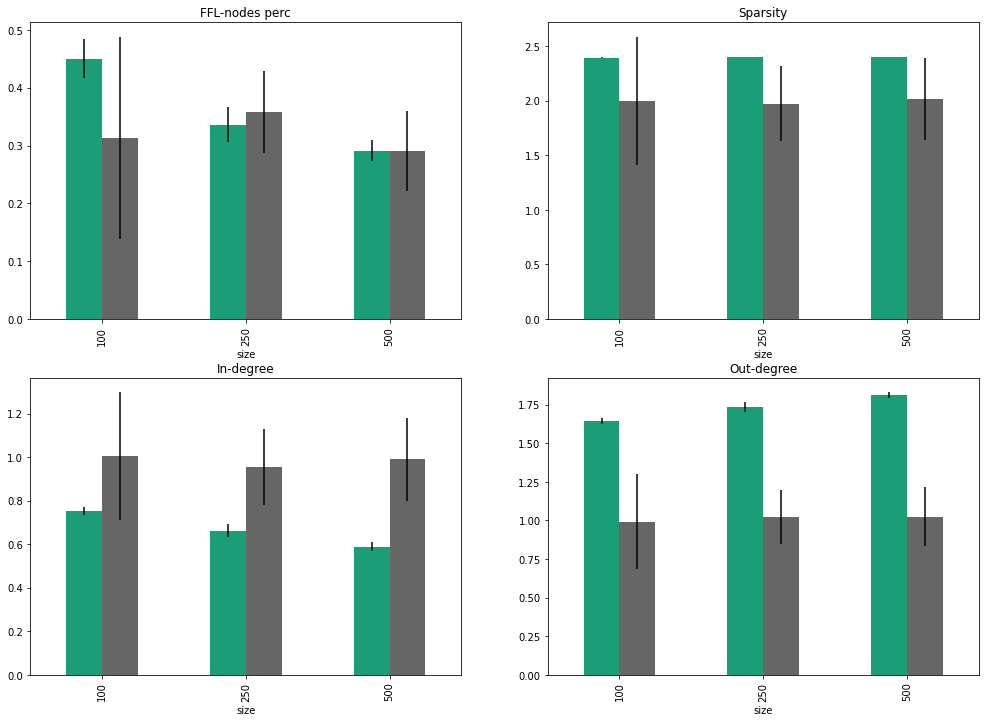

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

ffl_nodes = df_topo[['ffl-nodes', 'network', 'size']]
ffl_nodes.groupby(["network", "size"]).agg(np.mean).unstack(0).\
    plot(kind = "bar", y = "ffl-nodes", legend = False,\
         yerr = np.ravel(ffl_nodes.groupby(["network", "size"]).agg(np.std)).reshape(2,3),\
         ax=ax1, cmap='Dark2', figsize = (17,12), title = 'FFL-nodes perc')

sparsity = df_topo[['sparsity', 'network', 'size']]
sparsity.groupby(["network", "size"]).agg(np.mean).unstack(0).\
    plot(kind = "bar", y = "sparsity", legend = False,\
         yerr = np.ravel(sparsity.groupby(["network", "size"]).agg(np.std)).reshape(2,3),\
         ax=ax2, cmap='Dark2', figsize = (17,12), title = 'Sparsity')

in_degree = df_topo[['in-degree', 'network', 'size']]
in_degree.groupby(["network", "size"]).agg(np.mean).unstack(0).\
    plot(kind = "bar", y = "in-degree", legend = False,\
         yerr = np.ravel(in_degree.groupby(["network", "size"]).agg(np.std)).reshape(2,3),\
         ax=ax3, cmap='Dark2', figsize = (17,12), title = 'In-degree')

out_degree = df_topo[['out-degree', 'network', 'size']]
out_degree.groupby(["network", "size"]).agg(np.mean).unstack(0).\
    plot(kind = "bar", y = "out-degree", legend = False,\
         yerr = np.ravel(out_degree.groupby(["network", "size"]).agg(np.std)).reshape(2,3),\
         ax=ax4, cmap='Dark2', figsize = (17,12), title = 'Out-degree')


In [212]:
sparsity.groupby(["network", "size"]).agg(np.mean) - sparsity.groupby(["network", "size"]).agg(np.std)

sparsity
network size          
fflatt  100   2.388536
        250   2.396756
        500   2.398000
gnw     100   1.213026
        250   1.828446
        500   1.796740

In [208]:
sparsity.groupby(["network", "size"]).agg(np.mean) + sparsity.groupby(["network", "size"]).agg(np.std)

sparsity
network size          
fflatt  100   2.395464
        250   2.397911
        500   2.398000
gnw     100   2.316974
        250   2.743554
        500   2.887927

## Plot for Yeast

## Plot for Mouse

## Plot for Human